<font size="6"><b>Logistic Regression</b></font>

Table of Contents
<div id="toc"></div>

# 1. Linear Classification: Logistic Regression

## 1.1. Using all Distances
- Logistic regression is a classification algorithm - don't be confused


- Perceptron: make use of sign of data
- SVM: make use of margin (minimum distance)

- We want to use _distance information of all data points_ $\rightarrow$ logistic regression

<img src="./image_files/logistic_regression_distance.png", width=600>

- basic idea: find the decision boundary (hyperplane) of $g(x)=\omega^T x =0$ such that maximizes $\prod_i \lvert h_i \rvert$
    - Inequality of arithmetic and geometric means
$$ \frac{h_1+h_2}{2} \geq \sqrt{h_1 h_2} $$ 
 and that equality holds if and only if $h_1 = h_2$


- Roughly speaking, this optimization of $\max \prod_i \lvert h_i \rvert$ tends to position a hyperplane in the middle of two classes

$$h = \frac{g(x)}{\lVert \omega \rVert} = \frac{\omega^T x}{\lVert \omega \rVert} \approx \omega^T x$$


- We link or squeeze $(-\infty, +\infty)$ to $(0,1)$ for several reasons:

<img src="./image_files/link_function.png", width=500>

- If $\sigma(z)$ is the sigmoid function, or the logistic function
$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma(\omega^T x) = \frac{1}{1+e^{-\omega^T x}}$$
 - logistic function generates a value where is always either 0 or 1
 - Crosses 0.5 at the origin, then flattens out
 

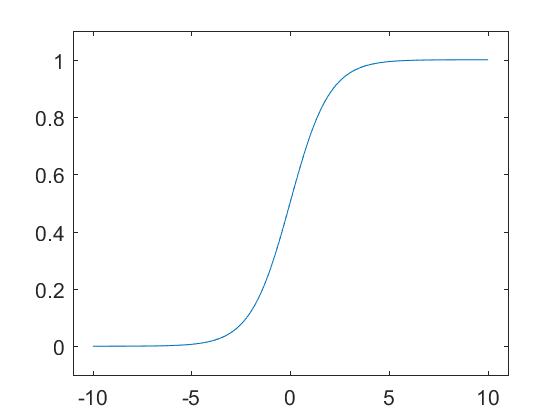

In [8]:
% What does the sigmoid function look like

z = -10:0.1:10;
s = 1./(1+exp(-z));
plot(z,s)
xlim([-11,11]), ylim([-0.1 1.1])

- Benefit of mapping via the logistic function

 - monotonic: same or similar optimziation solution
 - continuous and differentiable: good for gradient descent optimization
 - probability or confidence: can be considered as probability
 
 $$P\left(y = +1 \mid x,\omega\right) = \frac{1}{1+e^{-\omega^T x}} \in [0,1]$$
 <br>
 - Often we do note care about predicting the label $y$ for an example

 - Rather, we want to predict the label probabilities $P\left(y \mid x,\omega\right)$
    - $P\left(y = +1 \mid x,\omega\right)$: the probability that the label is $+1$
    - $P\left(y = 0 \mid x,\omega\right) =  1 - P\left(y = +1 \mid x,\omega\right)$: the probability that the label is $0$
    - In a sense, it is our confidence in the predicted label


- Goal: we need to fit $\omega$ to our data

## 1.2. Probabilistic  Approach (or MLE)

Consider a random variable $ y \in \{0, 1\} $ 

$$P(y=+1) = p, \quad P(y=0) = 1-p$$

where $ p \in [0, 1]$, and is assumed to depend on a vector of explanatory variables $x \in \mathbb{R}^n$

the logistic model has the form


$$
\begin{align*}
p &= \frac{1}{1+e^{-\omega^T x}} = \frac{e^{\omega^T x}}{e^{\omega^T x} + 1}\\
1-p &= \frac{1}{e^{\omega^T x} + 1}
\end{align*}
$$


We can re-order the data so far $x_1, \cdots, x_q$, the outcome is $y = +1$, and for $x_{q+1}, \cdots, x_m$, the outcome is $y=0$

The likelihood function

$$\mathscr{L} = \prod\limits_{i=1}^{q}{p_i}\prod\limits_{i=q+1}^{m}{(1-p_i)} \qquad \left(\sim \prod_i \lvert h_i \rvert \right)$$

the log likelihood function

$$
\begin{align*}
\mathscr{l}(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$

Since $\mathscr{l}$ is a concave function of $\omega$, the logistic regression problem can be solved as a convex optimization problem


$$\hat{\omega} = \arg\max_{\omega} \mathscr{l}(\omega)$$

## 1.3. Example with CVX


$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}, \quad x = \begin{bmatrix} x_1 \\ x_2 \\ 1\end{bmatrix}\\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} & 1 \\x_1^{(2)} & x_2^{(2)} & 1 \\x_1^{(3)} & x_2^{(3)} & 1 \\ \vdots & \vdots & \vdots \\\end{bmatrix}
\end{align*}
$$


Source: Section 7.1.1 from http://cvxr.com/cvx/examples/cvxbook/Ch07_statistical_estim/html/logistics.html

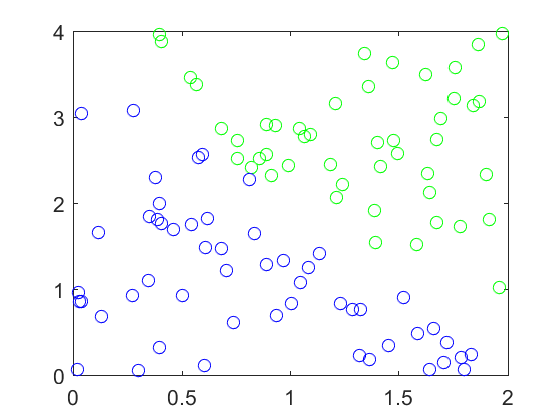

In [10]:
%plot -s 560,420

% Boyd & Vandenberghe, "Convex Optimization"
% Original by Lieven Vandenberghe
% Adapted for CVX by Argyris Zymnis - 01/31/06

% Generate data

rand('state',0);

m = 100;
w = [2;1;-4];

X = [2*rand(m,1) 4*rand(m,1) ones(m,1)];

y = 0.5 < exp(X*w)./(1+exp(X*w));

c1 = find(y == 1);
c2 = find(y == 0);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo');

$$
\begin{align*}
\mathscr{l}(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$

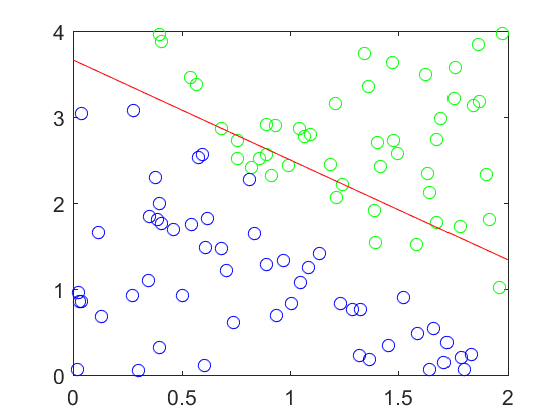

In [12]:
clear w

cvx_begin quiet
    variable w(3,1)
    maximize(y'*X*w - sum(log_sum_exp([zeros(1,m); w'*X'])))
cvx_end

xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off

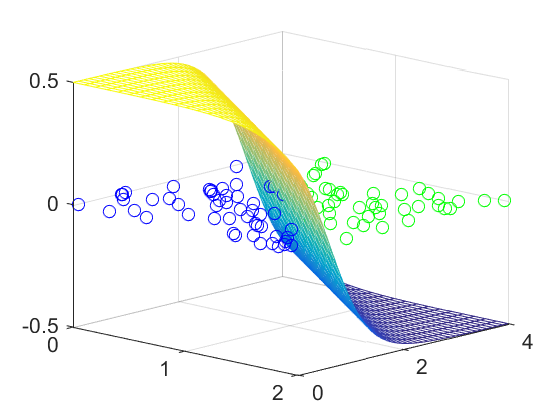

In [14]:
[X1,X2] = meshgrid(0:0.1:2,0:0.1:4);

w = w/norm(w,2)*10; % coefficients adjustment
Z = exp(X1*w(1) + X2*w(2) + w(3))./(1 + exp(X1*w(1) + X2*w(2) + w(3)))-1/2; % plane shifted down to 1/2

plot3(X(c1,1),X(c1,2),zeros(length(c1),1),'go',X(c2,1),X(c2,2),zeros(length(c2),1),'bo'), hold on
mesh(X1,X2,Z), hold off
grid on, view(43,16)

In [ ]:
help log_sum_exp

<font size='4'><b>In a more compact form</b></font>

Change $y \in \{0,+1\} \rightarrow y \in \{-1,+1\}$ for compuational convenience

- Consider the following function

$$P\left(y \mid x,\omega\right) = \sigma\left(y\omega^Tx\right) = \frac{1}{1+\exp\left(-y\omega^T x\right)} \in [0,1]$$

- Log-likelihood

$$
\begin{align*}
\mathscr{l}(\omega) = \log \mathscr{L} = \log P\left(y \mid x,\omega\right)& = \log \prod_{n=1}^{m} P\left(y_n \mid x_n,\omega\right)\\
&= \sum_{n=1}^{m} \log P\left(y_n \mid x_n,\omega\right)\\
&= \sum_{n=1}^{m} \log \frac{1}{1+\exp\left(-y_n\omega^T x_n\right)}\\
 &=  \sum\limits_{n=1}^{m}{-\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$

- MLE solution

$$
\begin{align*}
\hat{\omega} &= \arg \max_{\omega} \sum\limits_{n=1}^{m}{-\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}\\
             &= \arg \min_{\omega} \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$


In [ ]:
%%
y = double(y);
y(y == 0) = -1;

clear w

cvx_begin quiet
    variable w(3,1)
    minimize (sum(log_sum_exp([zeros(1,m); (y.*(X*w))'])))
cvx_end

xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off

## 1.4. Logistic Regression with Gradient Descent (Optional)


- Logistic regression
$$
\begin{align*}
J(\omega) = \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*} $$
- Gradient and Hessian given by:
$$
\begin{align*}
\nabla_{\omega}J(\omega) &= -X^T Z y\\
\nabla_{\omega}^2J(\omega) &= X^T Z(I-Z) X\\
\end{align*}
$$
 where
$$Z \in \mathbb{R}^{m\times m}, \qquad Z_{nn} = \frac{1}{1+\exp \left(-y_n\omega^T x_n \right) }$$


- See how fast it is in terms of computional time

In [ ]:
%% logistic regression using gradient descent

y = double(y);
y(y == 0) = -1;

k = size(X,2);
theta = zeros(k,1);

g = 1;

while (norm(g) > 1e-10)
    z = 1./(1 + exp(y.*(X*theta)));
    g = -X'*(z.*y);
    H = X'*diag(z.*(1-z))*X;
    theta = theta - H\g;    
end

%% plot
xp = 0:0.1:2;
yp = (-w(3) - w(1)*xp)./w(2);

plot(X(c1,1),X(c1,2),'go',X(c2,1),X(c2,2),'bo'),    hold on
plot(xp,yp,'r'),    hold off


# 2. Regularized Logistic Regression

- $l_2$ regularized logistic regression
    - make $\omega$ small
$$
\begin{align*}
\min_{\omega} &\; \lambda \rVert \omega \lVert_2^2 + \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*}
$$

- $l_1$ regularized logistic regression
    - make $\omega$ small and <font color='red'>sparse</font> $\rightarrow$ feature selection for classification

$$
\begin{align*}
\min_{\omega} &\; \lambda \rVert \omega \lVert_1 + \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*}
$$


- The effect of regularization will be more clearly illustrated with a non-linear data set

In [ ]:
%plot -s 560,420

% Generate data
rand('state',0);

m = 100;
w = [2;1;-4];

X = [2*rand(m,1) 4*rand(m,1) ones(m,1)];

y = 0.5 < exp(X*w)./(1+exp(X*w));

c1 = find(y == 1);
c2 = find(y == 0);

y = double(y);
y(y == 0) = -1;

In [ ]:
%%
clear w
g = 1;

cvx_begin quiet
    variable w(3,1)
    minimize (g*norm(w,2) + sum(log_sum_exp([zeros(1,m); (y.*(X*w))'])))
cvx_end

[X1,X2] = meshgrid(0:0.1:2,0:0.1:4);

Z = exp(X1*w(1) + X2*w(2) + w(3))./(1 + exp(X1*w(1) + X2*w(2) + w(3)))-1/2; % plane shifted down to 1/2

plot3(X(c1,1),X(c1,2),zeros(length(c1),1),'go',X(c2,1),X(c2,2),zeros(length(c2),1),'bo'), hold on
mesh(X1,X2,Z), hold off
grid on, view(43,16)

In [ ]:
%plot -s 560,900

clear w
g = [0.1 1 3];

for i = 1:3
    cvx_begin quiet
        variable w(3,1)
        minimize (g(i)*norm(w,2) + sum(log_sum_exp([zeros(1,m); (y.*(X*w))'])))
    cvx_end

    [X1,X2] = meshgrid(0:0.1:2,0:0.1:4);

    Z = exp(X1*w(1) + X2*w(2) + w(3))./(1 + exp(X1*w(1) + X2*w(2) + w(3)))-1/2; % plane shifted down to 1/2

    subplot(3,1,i),  plot3(X(c1,1),X(c1,2),zeros(length(c1),1),'go',X(c2,1),X(c2,2),zeros(length(c2),1),'bo'), hold on
    mesh(X1,X2,Z), hold off
    grid on, view(43,16)
end

- $l_1$ regularized logistic regression
    - make $\omega$ small and <font color='red'>sparse</font> $\rightarrow$ feature selection for classification

$$
\begin{align*}
\min_{\omega} &\; \lambda \rVert \omega \lVert_1 + \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*}
$$

In [ ]:
%plot -s 560,420

clear w
g = 1;

cvx_begin quiet
    variable w(3,1)
    minimize (g*norm(w,1) + sum(log_sum_exp([zeros(1,m); (y.*(X*w))'])))
cvx_end

[X1,X2] = meshgrid(0:0.1:2,0:0.1:4);

Z = exp(X1*w(1) + X2*w(2) + w(3))./(1 + exp(X1*w(1) + X2*w(2) + w(3)))-1/2; % plane shifted down to 1/2

plot3(X(c1,1),X(c1,2),zeros(length(c1),1),'go',X(c2,1),X(c2,2),zeros(length(c2),1),'bo'), hold on
mesh(X1,X2,Z), hold off
grid on, view(43,16)

# 3. Multiclass Classification (optional)

- Generalization to more than 2 classes is straightforward
- Using the soft-max function instead of the logistic function

$$P\left(y = k \mid x,\omega\right) = \frac{\exp{\left( \omega_k^T x \right) }}{\sum_k \exp{\left(\omega_k^T x \right)}} \in [0,1]$$

- We maintain a separator weight vector $\omega_k$ for each class $k$

# 4. Non-linear Classification (optional)

- Same idea as for linear regression: non-linear features, either explicit or implicit Kernels


__Explicit Feature Vector__

In [ ]:
x_c1 = [-1.1  0;
        -0.3  0.1;
        -0.9  1;
         0.8  0.4;
         0.4  0.9;
         0.3 -0.6;
        -0.5  0.3;
        -0.8  0.6
        -0.5 -0.5];
     
x_c2 = [-1   -1.3;
        -1.6  2.2;
         0.9 -0.7;
         1.6  0.5;
         1.8 -1.1;
         1.6  1.6;
        -1.6 -1.7;
        -1.4  1.8;
         1.6 -0.9;
         0   -1.6;
         0.3  1.7;
        -1.6  0;
        -2.1  0.2;];

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo')
axis([-3 3 -3 3]), axis equal

$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \Longrightarrow \quad
z = \phi(x) = \begin{bmatrix} 1\\ \sqrt{2}x_1\\ \sqrt{2}x_2 \\x_1^2 \\ \sqrt{2}x_1 x_2 \\x_2^2 \end{bmatrix}$$

In [ ]:
%% estimate w from logistic regression
X = [x_c1; x_c2];
y = [ones(length(x_c1),1); -ones(length(x_c2),1)];

m = length(y);

% nonlinear feature mapping
Z = [ones(m,1), sqrt(2)*X(:,1), sqrt(2)*X(:,2), ...
    X(:,1).^2, sqrt(2)*X(:,1).*X(:,2), X(:,2).^2];

clear w
cvx_begin quiet
    variable w(6,1)
    minimize (sum(log_sum_exp([zeros(1,m); (y.*(Z*w))'])))
cvx_end

w = w/norm(w)*10; % normalize

%% evaluate grid data for finding decision boundary 
[X1g, X2g] = meshgrid(-3:0.1:3,-3:0.1:3);
X_test = [X1g(:) X2g(:)];

m = length(X_test);

Z_test = [ones(m,1), sqrt(2)*X_test(:,1), sqrt(2)*X_test(:,2), ...
          X_test(:,1).^2, sqrt(2)*X_test(:,1).*X_test(:,2), X_test(:,2).^2];

y_hat = 1./(1 + exp(-Z_test*w));

% plotting a decision boundary
B = [];
for i = 1:length(y_hat)
    if abs(y_hat(i)-0.5) < 0.2
        B = [B; X_test(i,:)];         
    end    
end

plot(x_c1(:,1),x_c1(:,2),'ro',x_c2(:,1),x_c2(:,2),'bo'), hold on
plot(B(:,1),B(:,2),'k.'),   hold off
axis([-3 3 -3 3])

- $l_2$ regularized logistic regression
    - non-linear and overfitting
    - make $\omega$ small
$$
\begin{align*}
\min_{\omega} &\; \lambda \rVert \omega \lVert_2^2 + \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*}
$$

<a href = "https://www.dropbox.com/s/bsxxcahjm31gv9s/nonlinear_x.dat?dl=0"> download nonlinear_x </a>

<a href = "https://www.dropbox.com/s/6939y9e8jm9xp55/nonlinear_y.dat?dl=0"> download nonlinear_y </a>

download the data files 

In [ ]:
%plot -s 900,700
% source: By Andrew Ng at Stanford Univ.
% http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

X = load([pwd,'\image_files\nonlinear_x.dat']);
y = load([pwd,'\image_files\nonlinear_y.dat']); 

y(y == 0) = -1;  

pos = find(y+1);
neg = find(y-1);
plot(X(pos,1),X(pos,2),'r+',X(neg,1),X(neg,2),'bo')
axis equal

%% estimate w from regularized logistic regression for non-linear data
m = length(y);
d = 6;

% polynomial functions
Z = ones(m,1);
for i = 1:d
    for j = 0:i
        Z = [Z (X(:,1).^(i-j)).*(X(:,2).^j)];
    end
end

n = size(Z,2);

[X1g, X2g] = meshgrid(-3:0.01:3,-3:0.01:3);
X_test = [X1g(:) X2g(:)];

Z_test = ones(length(X_test),1);

for i = 1:d
    for j = 0:i
        Z_test = [Z_test (X_test(:,1).^(i-j)).*(X_test(:,2).^j)];
    end
end

g = [0 1];

for k = 1:length(g)
    clear w
    cvx_begin quiet
        variable w(n,1)
        minimize (g(k)*norm(w,2) + sum(log_sum_exp([zeros(1,m); (y.*(Z*w))'])))
    cvx_end
    
    y_hat = 1./(1 + exp(-Z_test*w));
    
    % plotting a decision boundary
    B = [];
    for i = 1:length(y_hat)
        if abs(y_hat(i)-0.5) < 0.1
            B = [B; X_test(i,:)];         
        end    
    end

    subplot(length(g),2,2*k-1), plot(X(pos,1),X(pos,2),'r+',X(neg,1),X(neg,2),'bo'), hold on
    plot(B(:,1),B(:,2),'k.'),   hold off, axis equal
    subplot(length(g),2,2*k), stem(w,'marker','none')  
end

- $l_1$ regularized logistic regression
    - nonlinear, overfitting, and too many features
    - make $\omega$ small and <font color='red'>sparse</font> $\rightarrow$ feature selection for classification

$$
\begin{align*}
\min_{\omega} &\; \lambda \rVert \omega \lVert_1 + \sum\limits_{n=1}^{m}{\log \left(1+\exp \left(-y_n\omega^T x_n \right) \right)}
\end{align*}
$$

In [ ]:
%plot -s 900,700
X = load([pwd,'\image_files\nonlinear_x.dat']);
y = load([pwd,'\image_files\nonlinear_y.dat']);

y(y == 0) = -1;  

pos = find(y+1);
neg = find(y-1);
plot(X(pos,1),X(pos,2),'r+',X(neg,1),X(neg,2),'bo')
axis equal

%% estimate w from regularized logistic regression for non-linear data
m = length(y);
d = 6;

% polynomial functions
Z = ones(m,1);
for i = 1:d
    for j = 0:i
        Z = [Z (X(:,1).^(i-j)).*(X(:,2).^j)];
    end
end

n = size(Z,2);

[X1g, X2g] = meshgrid(-3:0.01:3,-3:0.01:3);
X_test = [X1g(:) X2g(:)];

Z_test = ones(length(X_test),1);

for i = 1:d
    for j = 0:i
        Z_test = [Z_test (X_test(:,1).^(i-j)).*(X_test(:,2).^j)];
    end
end

g = [0 1];

for k = 1:length(g)
    clear w
    cvx_begin quiet
        variable w(n,1)
        minimize (g(k)*norm(w,1) + sum(log_sum_exp([zeros(1,m); (y.*(Z*w))'])))
    cvx_end
    
    y_hat = 1./(1 + exp(-Z_test*w));
    
    % plotting a decision boundary
    B = [];
    for i = 1:length(y_hat)
        if abs(y_hat(i)-0.5) < 0.1
            B = [B; X_test(i,:)];         
        end    
    end

    subplot(length(g),2,2*k-1), plot(X(pos,1),X(pos,2),'r+',X(neg,1),X(neg,2),'bo'), hold on
    plot(B(:,1),B(:,2),'k.'),   hold off, axis equal
    subplot(length(g),2,2*k), stem(w,'marker','none')  
end

__Implicit Feature Vector (Kernel)__

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')